<a href="https://colab.research.google.com/github/taxuyou/library-recommend/blob/master/%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [0]:
series = pd.read_csv('대출과날씨데이터1.csv',header=0, 
                     parse_dates=["date"])

In [4]:
series.shape

(10942, 5)

In [0]:
series['date']=series['date'].astype(str)

In [6]:
###   date를 받아와서 휴일, 일하는 날 구하기 
import datetime
def getDayName(a,b,c):
   
  return ['MON','TUE','WED','THU','FRI','SAT','SUN'][datetime.date(int(a),int(b),int(c)).weekday()]

# 리스트로 저장 -> DataFrame으로 변환순으로 가면되여
# 빈리스트 선언
list1 = []
for i in series['date']:
    a = i[0:4]
    b = i[5:7]
    c = i[11:13]
    # print(getDayName(a,b,c))
    # 리스트에 추가
    list1.append(getDayName(a,b,c))

# 리스트 -> DataFrame으로 전환    
series['days'] = list1
series.head()

,date,c,mm,h,loan,days
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI


In [7]:
## date 칼럼으로 요일 칼럼 days 만들어줌
list2 = []
for i in series['days']:
  if i == 'MON':
    list2.append(1)
  else:
    list2.append(0)
series["holiday"] = list2
series.head() 

,date,c,mm,h,loan,days,holiday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0


In [8]:
## 휴일 칼럼 만들어줌
list3 = []
for i in series['holiday']:
  if i == 0:
    list3.append(1)
  else:
    list3.append(0)

series['workingday'] = list3
series.head()

,date,c,mm,h,loan,days,holiday,workingday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0,1


In [0]:
series['date']=series['date'].astype(str)

In [10]:
###   계절 컬럼 만들어줌
list4 = []

for i in series['date']:
  b = i[5:7]
  if b == '01' :
    list4.append(1)
  elif b == '02' :
    list4.append(1)
  elif b == '03' :
    list4.append(1)
  elif b == '04' :
    list4.append(2)
  elif b == '05' :
    list4.append(2)            
  elif b == '06' :
    list4.append(2)
  elif b == '07' :
    list4.append(3)
  elif b == '08' :
    list4.append(3)
  elif b == '09' :
    list4.append(3)
  elif b == '10' :
    list4.append(4)
  elif b == '11' :
    list4.append(4)  
  elif b == '12' :
    list4.append(4)
    
series['season'] = list4
series.head()

,date,c,mm,h,loan,days,holiday,workingday,season
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1,0,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0,1,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0,1,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0,1,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0,1,1


In [11]:
###   데이터 속성
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
date          10942 non-null object
c             10942 non-null float64
mm            10942 non-null float64
h             10942 non-null float64
loan          10942 non-null int64
days          10942 non-null object
holiday       10942 non-null int64
workingday    10942 non-null int64
season        10942 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 769.4+ KB


In [0]:
series['date'] = pd.to_datetime(series['date'], errors='coerce')

In [16]:
### 년, 월, 일, 시, 분, 초 칼럼 따로 만들어줌
series["year"] = series["date"].dt.year
series["month"] = series["date"].dt.month
series["day"] = series["date"].dt.day
series["hour"] = series["date"].dt.hour
series["minute"] = series["date"].dt.minute
series["second"] = series["date"].dt.second

series.shape

(10942, 15)

In [17]:
series.head()

,date,c,mm,h,loan,days,holiday,workingday,season,year,month,day,hour,minute,second
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1,0,1,2017,1,1,9,0,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0,1,1,2017,1,1,10,0,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0,1,1,2017,1,1,11,0,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0,1,1,2017,1,1,12,0,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0,1,1,2017,1,1,13,0,0


In [18]:
series.loan.describe()

count    10942.000000
mean       232.713398
std        208.028655
min          1.000000
25%         82.000000
50%        192.000000
75%        323.000000
max       1268.000000
Name: loan, dtype: float64

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Hourly volume')]

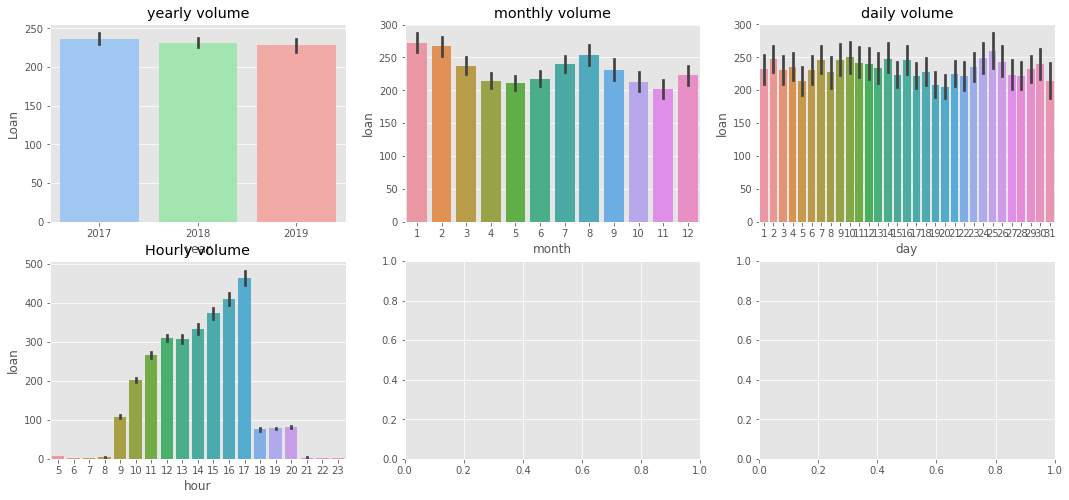

In [19]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
plt.style.use('seaborn-pastel')
sns.barplot(data=series, x="year", y="loan", ax=ax1)
sns.barplot(data=series, x="month", y="loan", ax=ax2)
sns.barplot(data=series, x="day", y="loan", ax=ax3)
sns.barplot(data=series, x="hour", y="loan", ax=ax4)

ax1.set(ylabel='Loan',title="yearly volume")
ax2.set(xlabel='month',title="monthly volume")
ax3.set(xlabel='day', title="daily volume")
ax4.set(xlabel='hour', title="Hourly volume")



*   항목 **연도별 대여량은 차이가 없다**
*   항목 **월별 대여량은 1월에 가장 많고, 2,8월도 대여량이 많다. 그리고 11월에 가장 적다.**
*   **일별 대여량은 1일부터 31일까지 있다**
*   **시간 대 대여량을 보면 퇴근 시간대인 16시에서 17시에 대여량이 많다.** 

*   **분, 초는 다 0이기 때문에 의미가 없다** 




[Text(0, 0.5, 'Loan'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'amount according to working day')]

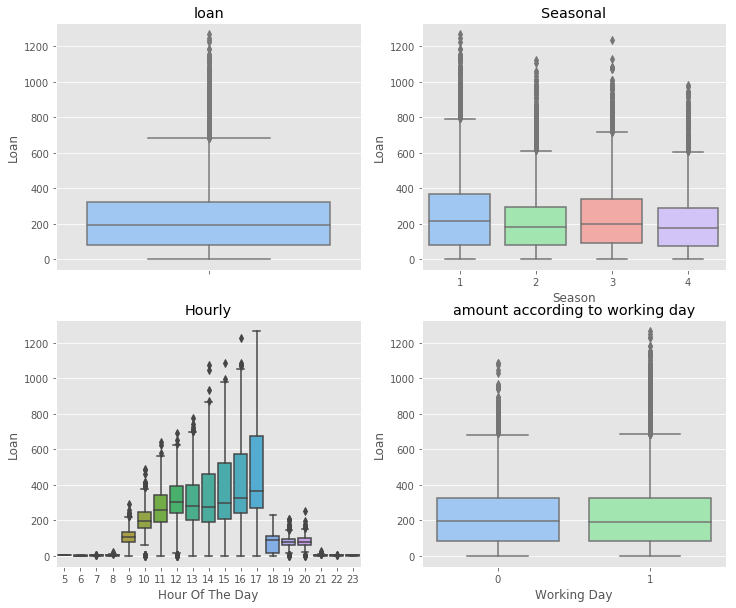

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=series,y="loan",orient="v",ax=axes[0][0])
sns.boxplot(data=series,y="loan",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=series,y="loan",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=series,y="loan",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Loan',title="loan")
axes[0][1].set(xlabel='Season', ylabel='Loan',title="Seasonal")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Loan',title="Hourly")
axes[1][1].set(xlabel='Working Day', ylabel='Loan',title="amount according to working day")

In [21]:
### 결측치 검사
series.isnull().sum()

date          0
c             0
mm            0
h             0
loan          0
days          0
holiday       0
workingday    0
season        0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [22]:
series["dayofweek"] = series["date"].dt.dayofweek
series.shape

(10942, 16)

In [23]:
#근무일만
series["dayofweek"].value_counts()

3    1777
4    1751
2    1728
1    1698
6    1343
5    1337
0    1308
Name: dayofweek, dtype: int64

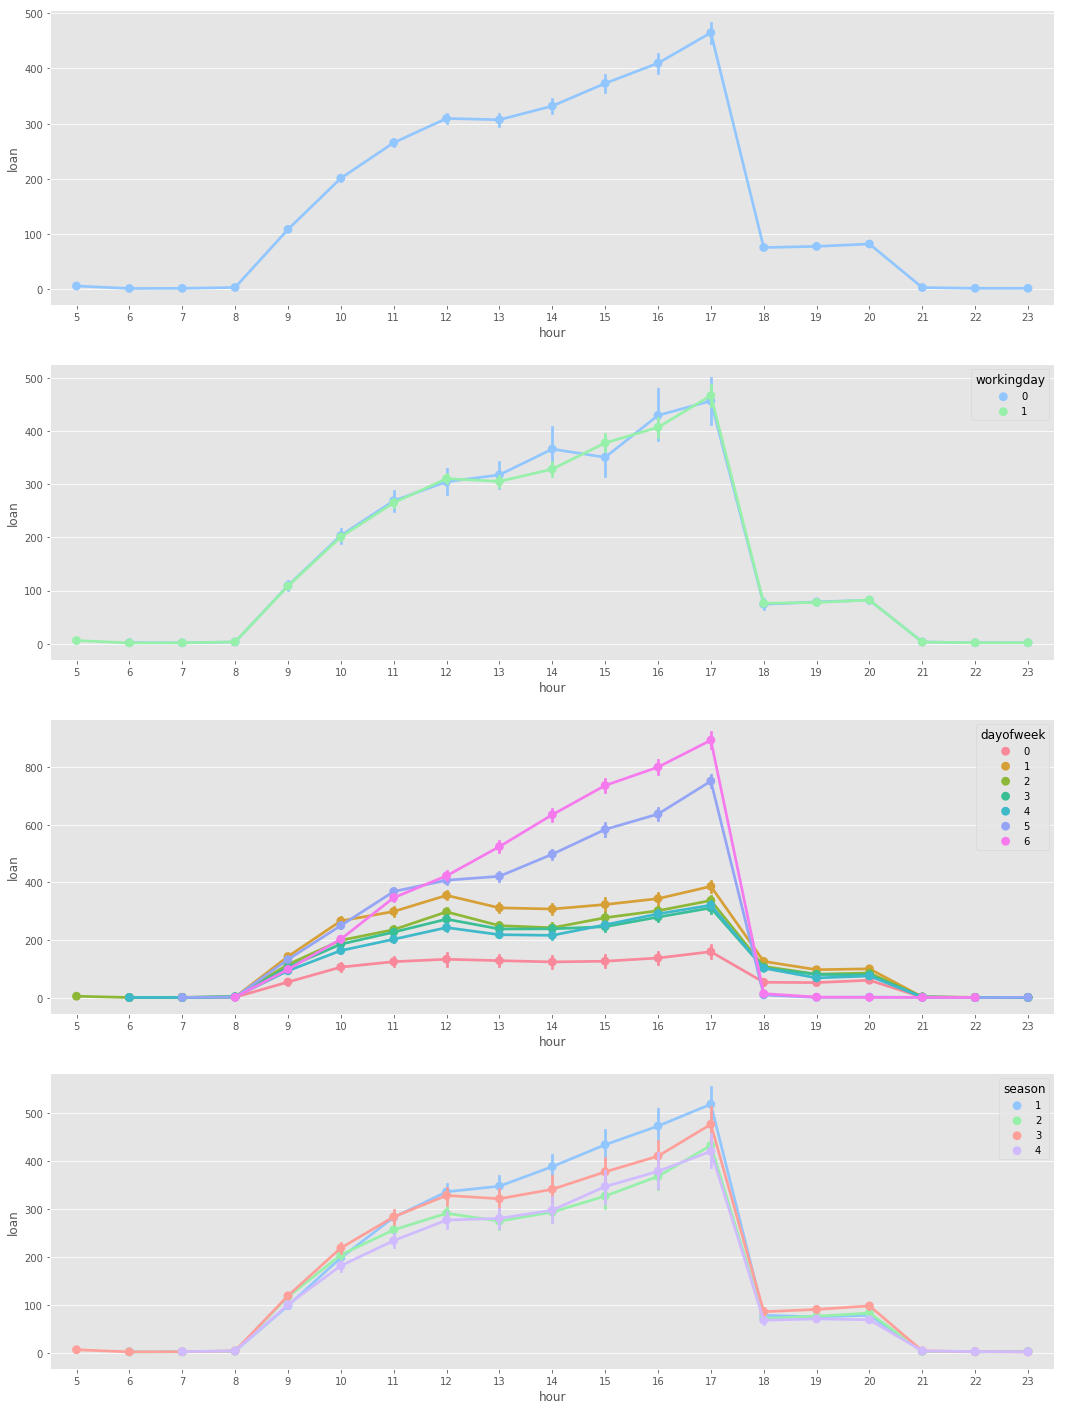

In [24]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18,25)

sns.pointplot(data=series, x="hour", y="loan", ax=ax1)

sns.pointplot(data=series, x="hour", y="loan", hue="workingday", ax=ax2)

sns.pointplot(data=series, x="hour", y="loan", hue="dayofweek", ax=ax3)

sns.pointplot(data=series, x="hour", y="loan", hue="season", ax=ax4)

In [25]:
###상관관계 분석
corrMatt = series[["c", "mm", "h", "loan"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

             c        mm         h      loan
c     1.000000  0.036733 -0.010085  0.116586
mm    0.036733  1.000000  0.181201 -0.013556
h    -0.010085  0.181201  1.000000 -0.324939
loan  0.116586 -0.013556 -0.324939  1.000000


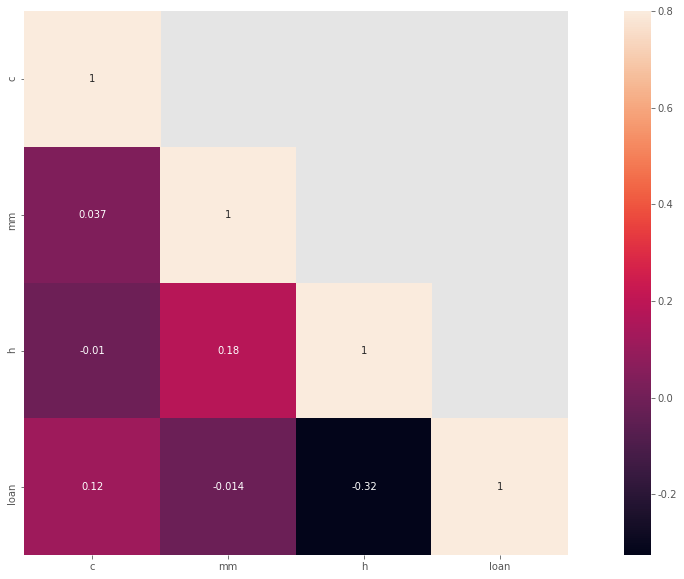

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)



*   **습도가 -0.32로 음의 상관관계가 있다.**




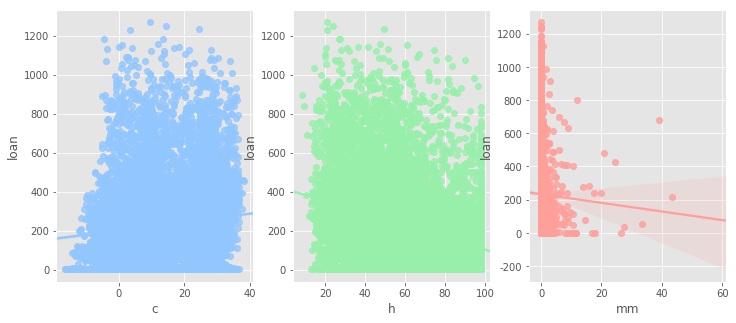

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="c", y="loan", data=series,ax=ax1)
sns.regplot(x="h", y="loan", data=series,ax=ax2)
sns.regplot(x="mm", y="loan", data=series,ax=ax3)



*   **강수량의 경우 0에 관측치가 몰려 있는 것으로 보인다.**



In [28]:
## 월별 데이터 시각화
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

series["year_month"] = series["date"].apply(concatenate_year_month)

print(series.shape)
series[["date", "year_month"]].head()

(10942, 17)


,date,year_month
0,2017-01-01 09:00:00,2017-1
1,2017-01-01 10:00:00,2017-1
2,2017-01-01 11:00:00,2017-1
3,2017-01-01 12:00:00,2017-1
4,2017-01-01 13:00:00,2017-1


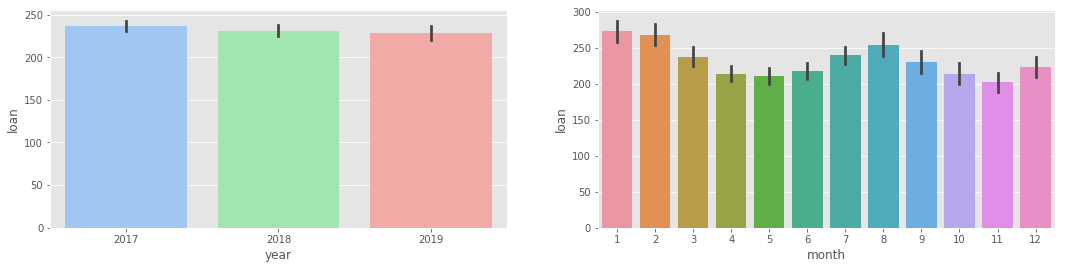

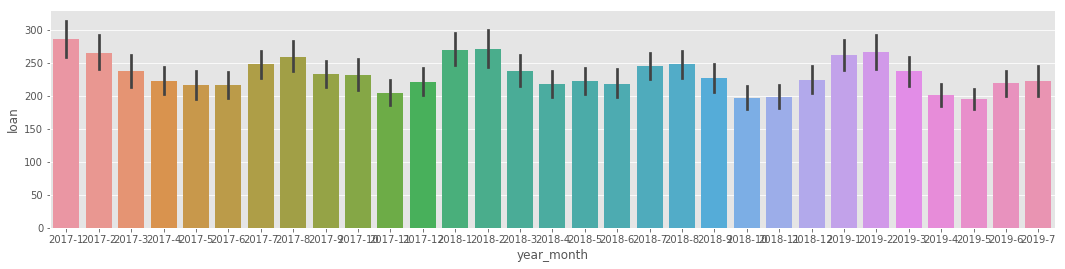

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=series, x="year", y="loan", ax=ax1)
sns.barplot(data=series, x="month", y="loan", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=series, x="year_month", y="loan", ax=ax3)



*   **더운 7,8월 여름과 1,2월 겨울에 대출량이 많아지는 추세이다.**
*   **여름보다는 겨울이 대출량이 많다.**







In [30]:
## 아웃라이어 데이터 제거
seriesWithoutOutliers = series[np.abs(series["loan"] - series["loan"].mean()) <= (3*series["loan"].std())]

print(series.shape)
print(seriesWithoutOutliers.shape)

(10942, 17)
(10760, 17)


((array([-3.82867765, -3.60452717, -3.48151329, ...,  3.48151329,
          3.60452717,  3.82867765]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.75343792, 6.75343792,
         6.75343792])),
 (1.4689422061327584, 4.697534184329208, 0.9003239600735751))

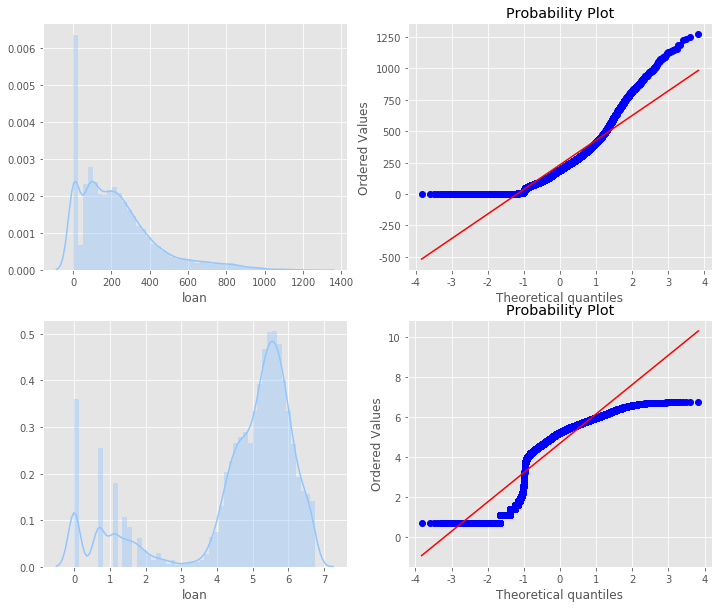

In [31]:
# loan값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(series["loan"], ax=axes[0][0])
stats.probplot(series["loan"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(seriesWithoutOutliers["loan"]), ax=axes[1][0])
stats.probplot(np.log1p(seriesWithoutOutliers["loan"]), dist='norm', fit=True, plot=axes[1][1])



*   **loan변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "loan"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.**


